In [4]:
import sys
import os
import toml
import pickle

import numpy as np



#src_path = os.path.join(os.path.dirname(__file__), 'src')
src_path = os.path.join(os.getcwd(), 'src')
sys.path.append(src_path)

import render_results
from reconnect_stat import *   # it's only for debug

config = toml.load("config.toml")
ser_recon_obj = config['files']['recon_objs']
Reconnect_Stat.RoamingOptions = config['options']

with open(ser_recon_obj, 'rb') as f:
    reconnect_objs = pickle.load(f)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
obj_for_plot = render_results.build_time_series(reconnect_objs[0].qualities_before_disconn)

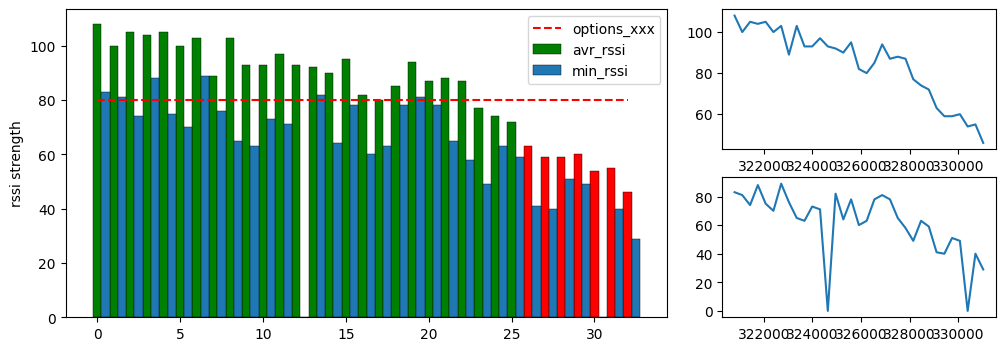

In [48]:
gridsize = (2, 3)
fig = plt.figure(figsize=(12, 4));
ax1 = plt.subplot2grid(gridsize, (0, 0), rowspan = 2, colspan=2)
ax2 = plt.subplot2grid(gridsize, (0, 2))
ax3 = plt.subplot2grid(gridsize, (1, 2))
width = 0.5

x = np.arange(len(obj_for_plot["time_stmps"]))
opt_ = np.ones(len(x)) * 80
style={'edgecolor' : 'black', 'linewidth': 0.3}
ax1.bar(x, obj_for_plot["avr_rssi"], width, color=obj_for_plot['avr_rssi_color'], label="avr_rssi", **style)
ax2.plot(obj_for_plot["time_stmps"], obj_for_plot["avr_rssi"])
ax1.bar(x + width, obj_for_plot["min_rssi"], width, label="min_rssi", **style) # ax1
ax3.plot(obj_for_plot["time_stmps"], obj_for_plot["min_rssi"])
ax1.plot(x, opt_, '--', color='r', label="options_xxx")
ax1.set_ylabel("rssi strength")
ax1.legend()

plt.close() # disable automatic output at the end of 
display(fig)

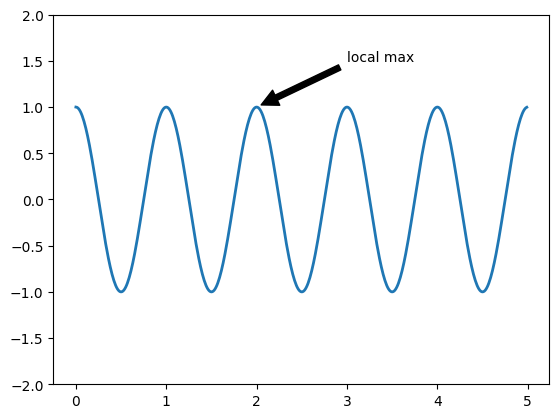

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)
plt.show()

In [32]:
%qtconsole